### **Twitter Sentiment Analysis Using NLTK**

The OpenAI API provides powerful, zero-shot classification capabilities so that text data can be classified into multiple categories – regardless of whether or not the model has encountered those categories.

In [ ]:
%pip install tweepy

In [11]:
import tweepy, json

with open('twitter_credentials.json', 'r') as f:
    credentials = json.load(f)

twitter_api_key = credentials['consumer_key']
twitter_api_secret = credentials['consumer_secret']

authentication = tweepy.AppAuthHandler(twitter_api_key, twitter_api_secret)
api_object = tweepy.API(authentication)

In [115]:
import pandas as pd

tweet_dataset = []
max_id = None
for i in range(10):
    tweets = api_object.search_tweets(q='"#MNCARS" -filter:retweets -filter:replies',
                                        lang="en",
                                        result_type="recent",
                                        count = 100,
                                        max_id=max_id
                                    )
    for tweet in tweets:
        tweet_content = {
            'date': tweet.created_at,
            'user_name': tweet.user.screen_name,
            'text': tweet.text,
        }
        tweet_dataset.append(tweet_content)
    if len(tweets) == 0:
        break
    max_id = tweets[-1].id - 1

tweet_dataframe = pd.DataFrame(tweet_dataset)
print(tweet_dataframe.shape)
tweet_dataframe.head()

(363, 3)


,date,user_name,text
0,2023-04-26 23:41:57+00:00,DAVILA795978943,.\n\nQuiz time! Acid test your luck with our T...
1,2023-04-26 23:36:08+00:00,dwcskyblue,Split scarves can fuck right off! #MNCARS http...
2,2023-04-26 23:33:51+00:00,TBaca92569,.\n\nQuiz time! 🔥 \nQ: What's better than winn...
3,2023-04-26 23:23:54+00:00,ChrisTwigger2,"Watching the #MNCARS highlights, is like playi..."
4,2023-04-26 23:01:36+00:00,Gloria_WK,Gutted for Arsenal. And I'm not even an Arsena...


In [116]:
tweet_dataframe['text'].iloc[1]

'Split scarves can fuck right off! #MNCARS https://t.co/oiZmaP5yrw'

##### Creating Dataset Containing Tweets Sentiments

In [117]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk_senti = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = nltk_senti.polarity_scores(text)['compound']

    if score > 0:
        sentiment = 'Positive'
    elif score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/novay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/novay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
from tqdm import tqdm
tqdm.pandas()

tweet_dataframe['sentiment'] = tweet_dataframe['text'].progress_apply(get_sentiment)
tweet_dataframe.head()

100%|██████████| 363/363 [00:00<00:00, 9425.81it/s]


,date,user_name,text,sentiment
0,2023-04-26 23:41:57+00:00,DAVILA795978943,.\n\nQuiz time! Acid test your luck with our T...,Positive
1,2023-04-26 23:36:08+00:00,dwcskyblue,Split scarves can fuck right off! #MNCARS http...,Negative
2,2023-04-26 23:33:51+00:00,TBaca92569,.\n\nQuiz time! 🔥 \nQ: What's better than winn...,Positive
3,2023-04-26 23:23:54+00:00,ChrisTwigger2,"Watching the #MNCARS highlights, is like playi...",Positive
4,2023-04-26 23:01:36+00:00,Gloria_WK,Gutted for Arsenal. And I'm not even an Arsena...,Positive


sentiment
Positive    151
Neutral     146
Negative     66
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

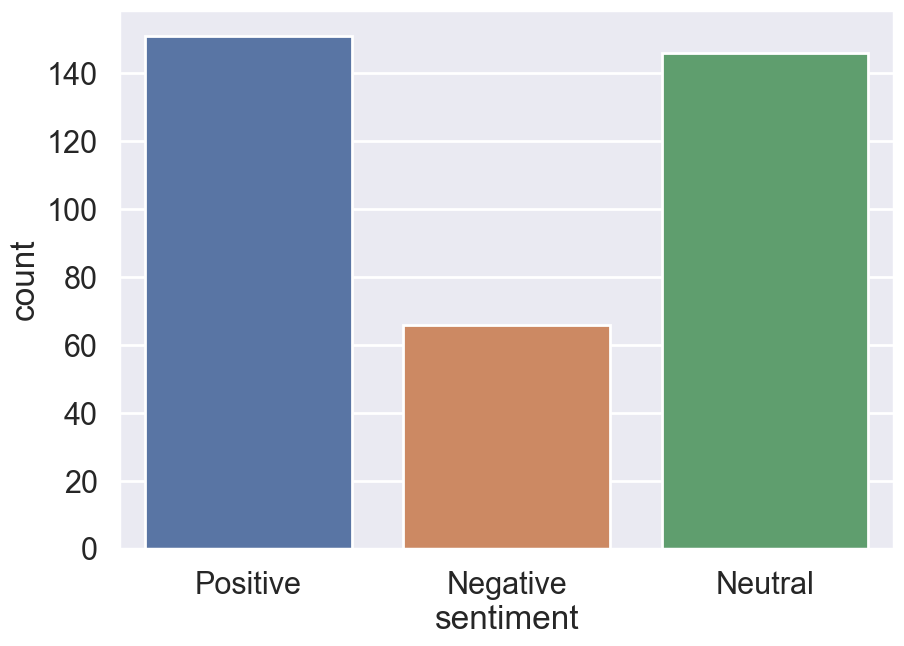

In [119]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("poster")

print(tweet_dataframe['sentiment'].value_counts())
sns.countplot(x='sentiment', data = tweet_dataframe)

In [120]:
positive_tweets = tweet_dataframe[tweet_dataframe['sentiment'] == 'Positive']['text'].tolist()
for i, pos in enumerate(positive_tweets[10:15]):
  print(i, " - ", pos)

0  -  BT Sport obsessing over Haaland’s hair like #MNCARS https://t.co/vURClLdzjA
1  -  God is the Greatest 💪 💪 💪 💯💯💯 #MNCARS https://t.co/Is8HVfU0AC
2  -  Arsenal have now conceded more goals in the Premier League than Manchester United 😂🤣🤣🤣

#MNCARS
3  -  Clearly, there’s levels to this. That was a humbling and we have to own it. Barring a major blip, I think we can sa… https://t.co/TarrdrXZGH
4  -  Artete give guardiola too much respect
#Arsenal #MNCARS


In [121]:
negative_tweets = tweet_dataframe[tweet_dataframe['sentiment'] == 'Negative']['text'].tolist()
for i, neg in enumerate(negative_tweets[10:15]):
  print(i, " - ", neg)

0  -  Arsenal was no Match for City at the Etihad… ETH might be the only guy to dethrone Pep in the near future, as it st… https://t.co/XmsJxNVD9z
1  -  Na this Arsenal guy I pity pass 😂😂😂
#MNCARS https://t.co/GGRVL8s3eU
2  -  Arteta is a coward #MNCARS
3  -  And they compared this bunch of bottlers to Liverpool. 😂😂😂

3 draws and a 4-1 hammering in a row in a ‘title race’.

Frauds.

#MNCARS
4  -  Damn. We couldn’t quite keep him from scoring #MNCARS https://t.co/aUOxoa52Au


##### Time Series Plots for Tweets Sentiments

In [122]:
tweet_dataframe['date'] = pd.to_datetime(tweet_dataframe['date'])
tweet_dataframe.set_index('date', inplace=True)
tweet_dataframe = tweet_dataframe.sort_values(by='date', ascending=True)
tweet_dataframe.head()

,user_name,text,sentiment
date,,,
2023-04-17 15:34:50+00:00,Arsenalgirluk,No Team has managed to win Arsenal home and Aw...,Positive
2023-04-17 19:33:28+00:00,AutoHeartland,"2014 Lexus GS 350 Base- $16,990\n\nAWD, Multip...",Neutral
2023-04-20 10:38:51+00:00,Kwanza254,What could go wrong if we show uo at Etihad li...,Negative
2023-04-21 21:06:14+00:00,beyondpitchpod,Will be interesting to see how much damage tha...,Negative
2023-04-21 21:29:11+00:00,im_Schand,It is going to be a thriller at Etihad this We...,Positive


In [123]:
tweet_dataframe['positive_sent'] = (tweet_dataframe['sentiment'] == 'Positive').cumsum()
tweet_dataframe['negative_sent'] = (tweet_dataframe['sentiment'] == 'Negative').cumsum()
tweet_dataframe['neutral_sent'] = (tweet_dataframe['sentiment'] == 'Neutral').cumsum()
tweet_dataframe.head()

,user_name,text,sentiment,positive_sent,negative_sent,neutral_sent
date,,,,,,
2023-04-17 15:34:50+00:00,Arsenalgirluk,No Team has managed to win Arsenal home and Aw...,Positive,1,0,0
2023-04-17 19:33:28+00:00,AutoHeartland,"2014 Lexus GS 350 Base- $16,990\n\nAWD, Multip...",Neutral,1,0,1
2023-04-20 10:38:51+00:00,Kwanza254,What could go wrong if we show uo at Etihad li...,Negative,1,1,1
2023-04-21 21:06:14+00:00,beyondpitchpod,Will be interesting to see how much damage tha...,Negative,1,2,1
2023-04-21 21:29:11+00:00,im_Schand,It is going to be a thriller at Etihad this We...,Positive,2,2,1


In [124]:
row_sum = tweet_dataframe[['positive_sent', 'negative_sent', 'neutral_sent']].sum(axis=1)

tweet_dataframe['positive_sent'] = tweet_dataframe['positive_sent'] / row_sum * 100
tweet_dataframe['negative_sent'] = tweet_dataframe['negative_sent'] / row_sum * 100
tweet_dataframe['neutral_sent'] = tweet_dataframe['neutral_sent'] / row_sum * 100

tweet_dataframe.head(40)

,user_name,text,sentiment,positive_sent,negative_sent,neutral_sent
date,,,,,,
2023-04-17 15:34:50+00:00,Arsenalgirluk,No Team has managed to win Arsenal home and Aw...,Positive,100.000000,0.000000,0.000000
2023-04-17 19:33:28+00:00,AutoHeartland,"2014 Lexus GS 350 Base- $16,990\n\nAWD, Multip...",Neutral,50.000000,0.000000,50.000000
2023-04-20 10:38:51+00:00,Kwanza254,What could go wrong if we show uo at Etihad li...,Negative,33.333333,33.333333,33.333333
2023-04-21 21:06:14+00:00,beyondpitchpod,Will be interesting to see how much damage tha...,Negative,25.000000,50.000000,25.000000
2023-04-21 21:29:11+00:00,im_Schand,It is going to be a thriller at Etihad this We...,Positive,40.000000,40.000000,20.000000
2023-04-22 01:58:49+00:00,c21attridge95,"I'm calling it, if Arsenal do blow their shot ...",Negative,33.333333,50.000000,16.666667
2023-04-22 10:00:08+00:00,MelbArsenal,A season defining match coming up this thursda...,Neutral,28.571429,42.857143,28.571429
2023-04-23 07:06:20+00:00,Cranimahparson2,Good morning Arsenal fans\n#MNCARS https://t.c...,Positive,37.500000,37.500000,25.000000
2023-04-23 07:14:26+00:00,martin1ricketts,We’ve only lost 3 games all season in the leag...,Negative,33.333333,44.444444,22.222222


In [125]:
window_size = 10

time_series_df = tweet_dataframe.iloc[window_size-1::window_size]
time_series_df.head()

,user_name,text,sentiment,positive_sent,negative_sent,neutral_sent
date,,,,,,
2023-04-23 16:20:58+00:00,ArsenalPhilly,Because of the expected large crowd and magnit...,Positive,40.000000,40.000000,20.000000
2023-04-25 18:46:04+00:00,AutoHeartland,"2014 BMW 528i xDrive- $9,990\n\nLeather Seats,...",Neutral,45.000000,35.000000,20.000000
2023-04-26 09:16:15+00:00,Jayp6181,My @Arsenal lineup tonight Vs Man City 💪🏽🔴 #MN...,Neutral,46.666667,26.666667,26.666667
2023-04-26 14:07:25+00:00,TheAngryLeftie,Mikel Arteta Answering if City game is title d...,Neutral,42.500000,22.500000,35.000000
2023-04-26 15:06:09+00:00,OverandArsenal,🚨MATCHDAY LIVE TONIGHT 7.45PM - @ManCity v @Ar...,Negative,38.000000,22.000000,40.000000


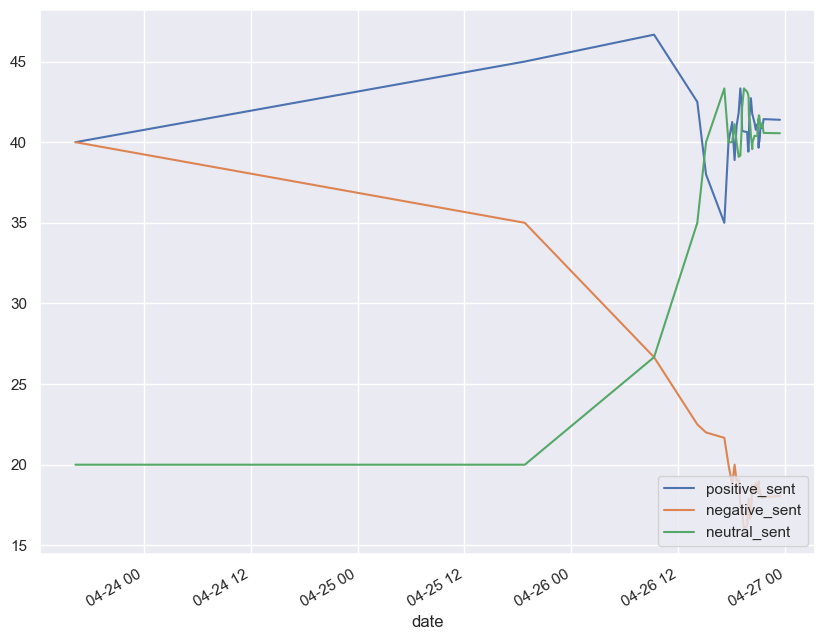

In [126]:
import matplotlib.pyplot as plt

sns.set_context("notebook")

time_series_df.plot(y = ["positive_sent", "negative_sent", "neutral_sent"], 
                    kind = "line", 
                    figsize = (10, 8)).legend(loc='lower right')

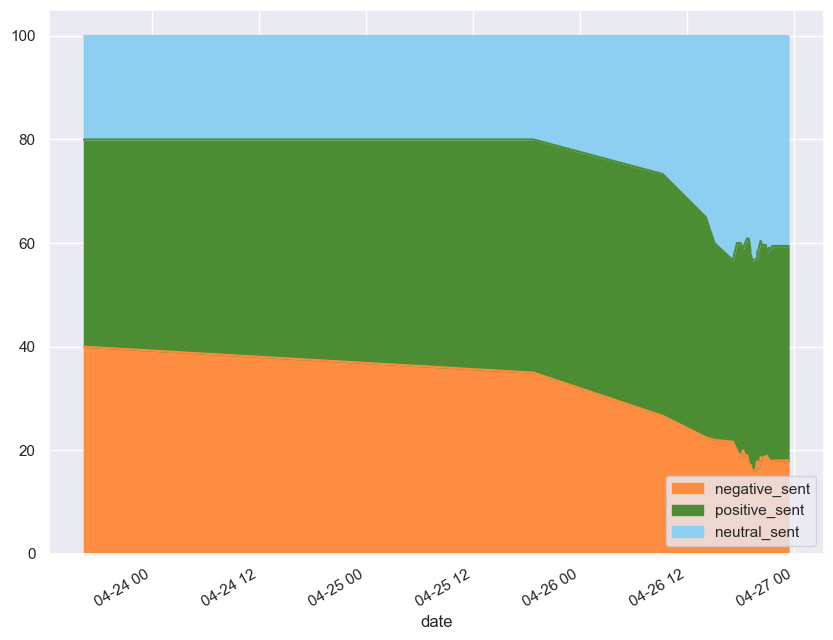

In [127]:
time_series_df.plot(y = ["negative_sent", "positive_sent",  "neutral_sent"], 
                    kind = "area", 
                    figsize = (10, 8),
                    color=( '#FF8D41', '#4C8D34', '#8CCFF0')).legend(loc='lower right')